#  PREDICTIVE MODELS FOR TARGETING AND CROSS-SELLING INSURANCE 

### Importing the libraries and dependencies 


In [1]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, auc, roc_curve, classification_report


### Importing dataset

In [2]:
#Importing and reading the data using Pandas read_csv() method.

data = pd.read_csv("data.csv", index_col="id")

# Data Exploration

In [3]:
#Viewing the first 5 rows of the data in a pd table

data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
#Showing statistical description of the data (mean, count, std, min, 25% , 50%, 75%, max) in each column

data.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
#Information on each attribute and data type

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


In [6]:
#List of the attribute whose Dtype is object

object_features = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

#List of the numerical attributes whose Dtype is int64 or float64

numeric_features = ["Age", "Driving_License", "Region_Code", 
              "Previously_Insured", "Annual_Premium", 
              "Policy_Sales_Channel", "Vintage"
             ]


#Exploring the value count for each of the category attributes and the number of categories.

for obj in object_features:
    print(f'{obj}: \n', data[obj].value_counts(), '\n _______________\n')
    

Gender: 
 Male      206089
Female    175020
Name: Gender, dtype: int64 
 _______________

Vehicle_Age: 
 1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64 
 _______________

Vehicle_Damage: 
 Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64 
 _______________



## Exploring the distribution of the numerical attributes 

- all observations have a Driving_license and would not add any information to the decision making of the models.

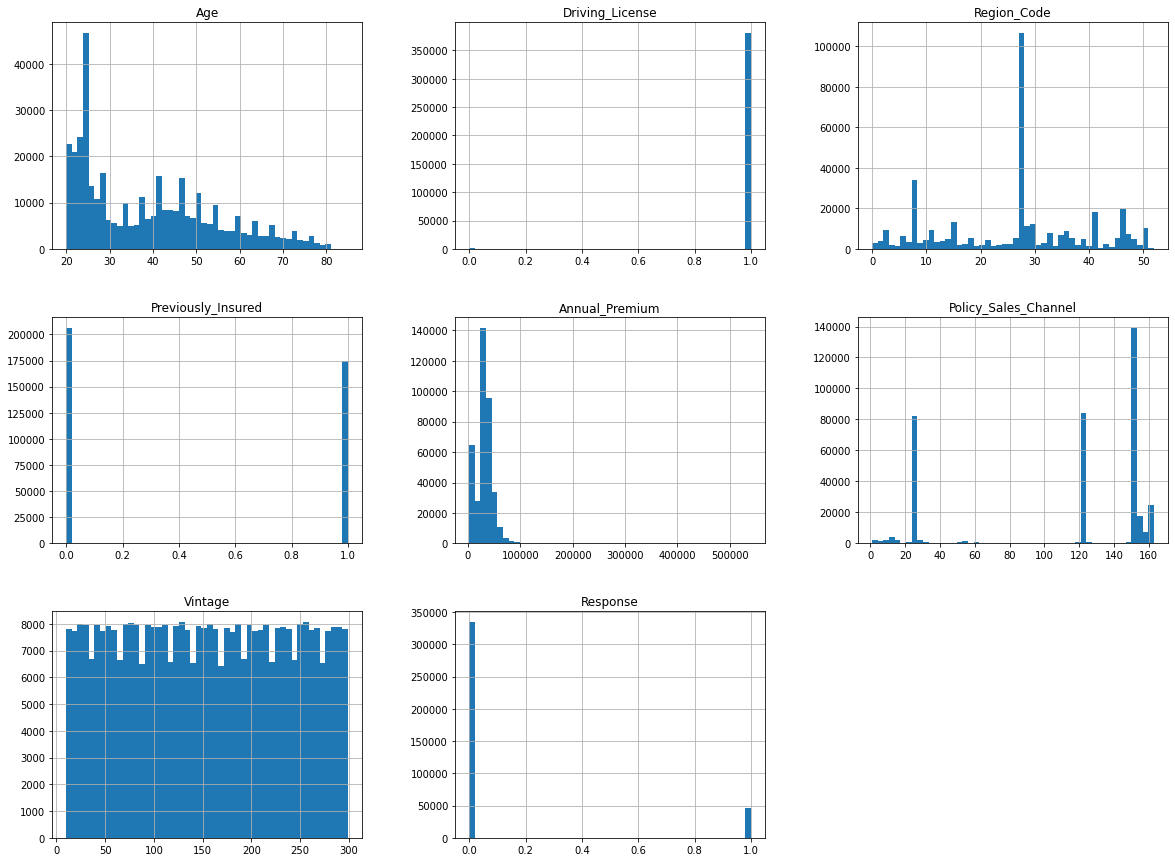

In [7]:
#Exploring the distribution of the numerical data.

data.hist(bins=50, figsize=(20,15))
plt.show()

#boxplot for annual premium

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


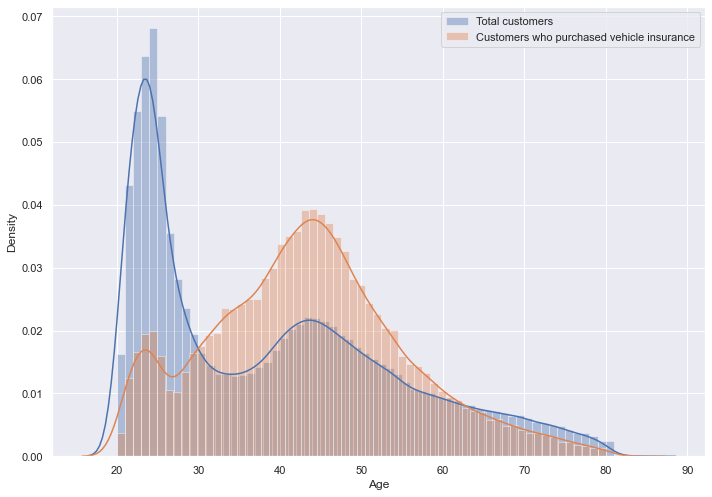

In [8]:
#visualizing the age group of uses that purchase vehicle insurance 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data.Age, label = "Total customers", bins=65)
sns.distplot(data.Age.loc[data.Response == 1], label = "Customers who purchased vehicle insurance", bins=64)
plt.legend()

In [9]:
#Checking for correlation between the features and the target value. 

data.corr()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Age,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Driving_License', ylabel='Age'>,
        <AxesSubplot:xlabel='Region_Code', ylabel='Age'>,
        <AxesSubplot:xlabel='Previously_Insured', ylabel='Age'>,
        <AxesSubplot:xlabel='Annual_Premium', ylabel='Age'>,
        <AxesSubplot:xlabel='Policy_Sales_Channel', ylabel='Age'>,
        <AxesSubplot:xlabel='Vintage', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Driving_License'>,
        <AxesSubplot:xlabel='Driving_License', ylabel='Driving_License'>,
        <AxesSubplot:xlabel='Region_Code', ylabel='Driving_License'>,
        <AxesSubplot:xlabel='Previously_Insured', ylabel='Driving_License'>,
        <AxesSubplot:xlabel='Annual_Premium', ylabel='Driving_License'>,
        <AxesSubplot:xlabel='Policy_Sales_Channel', ylabel='Driving_License'>,
        <AxesSubplot:xlabel='Vintage', ylabel='Driving_License'>],
       [<AxesSubplot:xlabel='Age', ylabel='Region_Code'>,
        <AxesSubplot:x

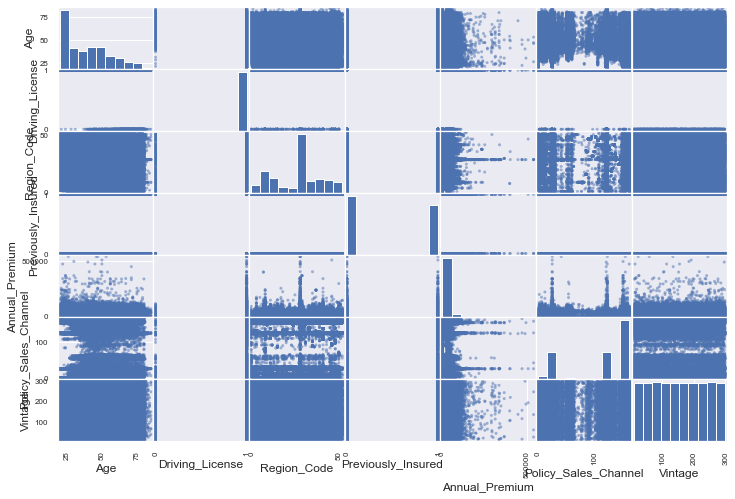

In [10]:
#checking for feature correlation using scatter matrix. 

scatter_matrix(data[numeric_features], figsize=(12, 8))

### Target Variable Responses

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

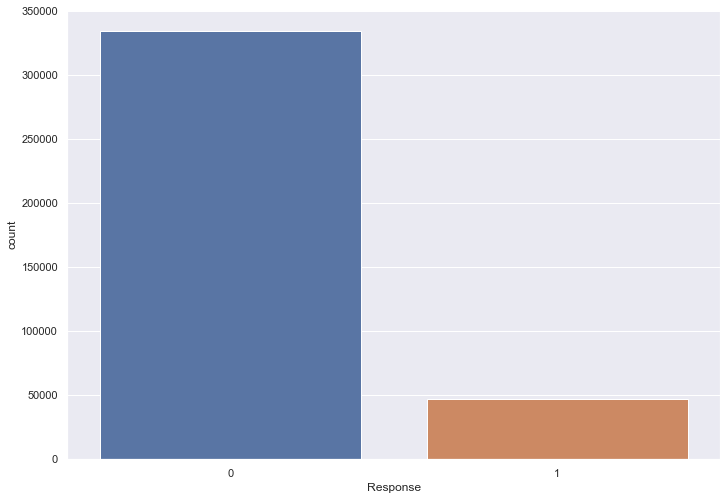

In [11]:
sns.countplot(data.Response)

In [12]:
print("Percentage of Rejected: ", data.Response.value_counts(normalize=True)[0] * 100,"%")
print("Percentage of Accepted: ", data.Response.value_counts(normalize=True)[1] * 100,"%")


Percentage of Rejected:  87.74366388618479 %
Percentage of Accepted:  12.256336113815209 %


# Data Preprocessing

##  Checking for missing values
- No missing value in the data

In [13]:
#Checking for missing data or nul data. 

data.isnull().any()

Gender                  False
Age                     False
Driving_License         False
Region_Code             False
Previously_Insured      False
Vehicle_Age             False
Vehicle_Damage          False
Annual_Premium          False
Policy_Sales_Channel    False
Vintage                 False
Response                False
dtype: bool

## Splitting the dataset into training and testing dataset

- Train size = 80%
- Test size = 20%

In [14]:
#splitting data into training and testing set with a random split. 

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [15]:
#length of the training and testing data

len(train_set), len(test_set)

(304887, 76222)

In [16]:
#copying the target value from the training dataset to for the target  
y = train_set["Response"].copy()

In [17]:
#Droping the target values from the training data set to get the features

X = train_set.drop("Response", axis=1)


### Using categorical encoder and scaler for categorical and numerical variables

In [18]:
# Use to encode the categorical features
cat_encoder = OneHotEncoder()

# To scale the numerical features for normalization
num_scaler = StandardScaler()


### Creating a pipeline for category and object transformation

In [19]:
#Creating a pipeline transformer for encoding categorical attributes and normalising numerical attributes

pipeline = ColumnTransformer([
("num", num_scaler, numeric_features),
("cat", cat_encoder, object_features)])


In [20]:
#transforming the training data with the piepline
X_trans = pipeline.fit_transform(X)

# Training and Evaluating the Models

## 1. Random Forest Classifier


In [21]:
#Creating an instance of the Random forest classifier

model1 = RandomForestClassifier()

In [22]:
#Splitting the training data set X_trans and y into training and validation sets at a ratio of 70:30

X_train, X_val, y_train, y_val = train_test_split(X_trans, y, test_size=0.30)

In [23]:
#Training the model on the training set

model1.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
#predicting and testing the model on the training and validation set
model1_y_pred_train = model1.predict(X_train)
model1_y_pred_val = model1.predict(X_val)

In [25]:
#evaluating the performance on the training set and test set

print("Prediction on Training Set: ", accuracy_score(y_train, model1_y_pred_train))
print("Prediction on Validation set: ", accuracy_score(y_val, model1_y_pred_val))

#predict_proba(X) rank on how likely they will purchase a cross-sell

Prediction on Training Set:  0.9998922312810421
Prediction on Validation set:  0.8688270086479277


### Tuning the random forest model

In [26]:
#Using Scikit-Learn’s GridSearchCV to check what best value suit the hyperparameter of the Randomforest Model

#creating the params for the hyperparameters of the models
param_grid = [
                {'n_estimators': [50, 100, 150, 300], 'max_features': [2, 6, 8, 10]},
                {'bootstrap': [False], 'n_estimators': [10, 30, 100], 'max_features': [2, 3, 4]},
                {'criterion': ['gini', 'entropy']}
             ]

#Creating a search grid to be evaluated with our model on the params created above

grid_model =  RandomForestClassifier()
grid_search = GridSearchCV(grid_model, param_grid, cv=5, scoring='accuracy', return_train_score=True)

#Fitting the grid with the data

grid_search.fit(X_trans, y)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 6, 8, 10],
                          'n_estimators': [50, 100, 150, 300]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [10, 30, 100]},
                         {'criterion': ['gini', 'entropy']}],
             return_train_score=True, scoring='accuracy')

In [27]:
#Checking the best hyperparameter for our model

grid_search.best_params_

{'max_features': 2, 'n_estimators': 300}

In [28]:
#creating the final model for the random forest classifier using the best hyperparameters 

tuned_model1 = RandomForestClassifier(max_features= 2, n_estimators = 300)

In [29]:
#training the model on the training set

tuned_model1.fit(X_train,y_train)


RandomForestClassifier(max_features=2, n_estimators=300)

In [30]:
#evaluating the model on the validation set
tuned_model1_y_pred_train = tuned_model1.predict(X_train)
tuned_model1_y_pred_val = tuned_model1.predict(X_val)

In [31]:
#evaluating the performance on the training set and test set

print("Prediction on Training Set: ", accuracy_score(y_train, tuned_model1_y_pred_train))
print("Prediction on Validation set: ", accuracy_score(y_val, tuned_model1_y_pred_val))

Prediction on Training Set:  0.9999156592634242
Prediction on Validation set:  0.8696141777908972


### Feature Importance


In [32]:
# re_contructing the variables encoded via the pipeline 

cat_encoder = pipeline.named_transformers_["cat"]
cat_1 = list(cat_encoder.categories_[0])
cat_2 =list(cat_encoder.categories_[1])
cat_3 =list(cat_encoder.categories_[2])
attribs = numeric_features + cat_1 + cat_2 + cat_3

In [34]:
feat_imp = pd.Series(tuned_model1.feature_importances_, attribs).sort_values(ascending=False)

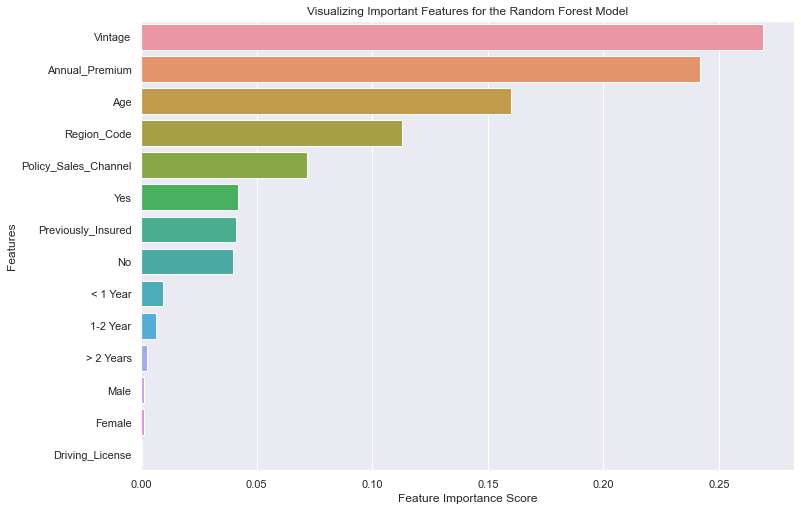

In [35]:
# Creating a bar plot
sns.barplot(x=feat_imp, y=feat_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for the Random Forest Model")
plt.show()

### Feature selection from the important features. 

Training a new model based on the selected features from the feature importance, slicing the data to the new features selected and preprocessing the data and training a new model. 

In [36]:
#Selected features important to the Model
selected_cat_features= [ 'Vehicle_Age', 'Vehicle_Damage']

#List of the numerical attributes whose Dtype is int64 or float64
selected_num_features= ["Age", "Region_Code", "Previously_Insured", "Annual_Premium", "Policy_Sales_Channel", "Vintage"]


In [37]:
#copy the training dataset to a new table 

new_data = train_set.copy()

#copy the target values of the training dataset
y1 = new_data['Response'].copy()

#copy the selected feature
X1 = new_data.drop(['Response', 'Gender', 'Driving_License'], axis=1)

In [38]:
#creating a new pipeline for the model
new_pipeline = ColumnTransformer([
                                    ("num", num_scaler, selected_num_features),
                                    ("cat", cat_encoder, selected_cat_features)
                                ])

In [39]:
#fitting the new pipeline with the dataset with the new selected features

X1_prep = new_pipeline.fit_transform(X1)

In [40]:
#Final model would be trained on the entire training dataset and tested on the test set.

final_model = RandomForestClassifier(max_features=2, n_estimators=300)

In [41]:
#fitting the model

final_model.fit(X1_prep, y1)

RandomForestClassifier(max_features=2, n_estimators=300)

In [42]:
#preparing the test set

#copy the test dataset
test_set1 = test_set.copy()

#copy the target values of the test dataset
y_test1= test_set1['Response'].copy()

#droping the least important features and the target value from the test dataset
X_test1 = test_set1.drop(['Response', 'Gender', 'Driving_License'], axis=1)

In [43]:
#passing the features of the test set through the pipeline for transformation
X_test_prep = new_pipeline.transform(X_test1)

In [44]:
#evaluating the model on the test dataset
y_test_pred1 = final_model.predict(X_test_prep)

## Evaluating the Random Forest Model



In [45]:
#evaluating the accuracy on the test set

print("Prediction accuracy on Test set: ", accuracy_score(y_test1, y_test_pred1))

Prediction accuracy on Test set:  0.864356747395765


## Classification report

In [46]:
print(classification_report(y_test1, y_test_pred1))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     66699
           1       0.37      0.12      0.18      9523

    accuracy                           0.86     76222
   macro avg       0.63      0.55      0.55     76222
weighted avg       0.82      0.86      0.83     76222



### ROC Curve & AUC of Random forest classifier

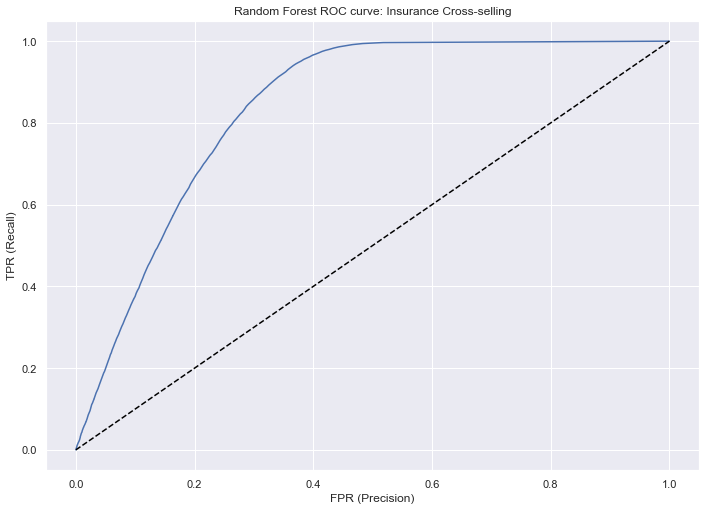

Area under curve (AUC):  0.8391609650333974


In [47]:
y_score = final_model.predict_proba(X_test_prep)[:,1]
fpr, tpr, _ = roc_curve(y_test1, y_score)  

plt.title('Random Forest ROC curve: Insurance Cross-selling')
plt.xlabel('FPR (Precision)') # false positive rate
plt.ylabel('TPR (Recall)')   # true positive rate

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr)) 

# 2. Gradient boosting Classifier

In [48]:
#Creating an instance of the Random forest classifier

model2 = GradientBoostingClassifier(random_state=0, max_depth=1)

In [49]:
#Splitting the training data set X_trans and y into training and validation sets at a ratio of 70:30

X_train2, X_val2, y_train2, y_val2 = train_test_split(X_trans, y, test_size=0.30)

In [50]:
#Training the model on the training set
model2.fit(X_train2,y_train2)

GradientBoostingClassifier(max_depth=1, random_state=0)

In [51]:
#predicting and evaluating the model on the training and validation set
model2_y_pred_train = model1.predict(X_train2)
model2_y_pred_val = model1.predict(X_val2)

### Evaluating the Gradient Boosting Classifier performance 

- The model performed well on the validation set and on the training set 

In [52]:
#evaluating the performance on the training set and Validation set

print("Prediction on Training Set: ", accuracy_score(y_train2, model2_y_pred_train))
print("Prediction on Validation set: ", accuracy_score(y_val2, model2_y_pred_val))

Prediction on Training Set:  0.9603317402305314
Prediction on Validation set:  0.9611335235658762


### Feature Importance

In [53]:
feat_imp2 = pd.Series(model2.feature_importances_, attribs).sort_values(ascending=False)

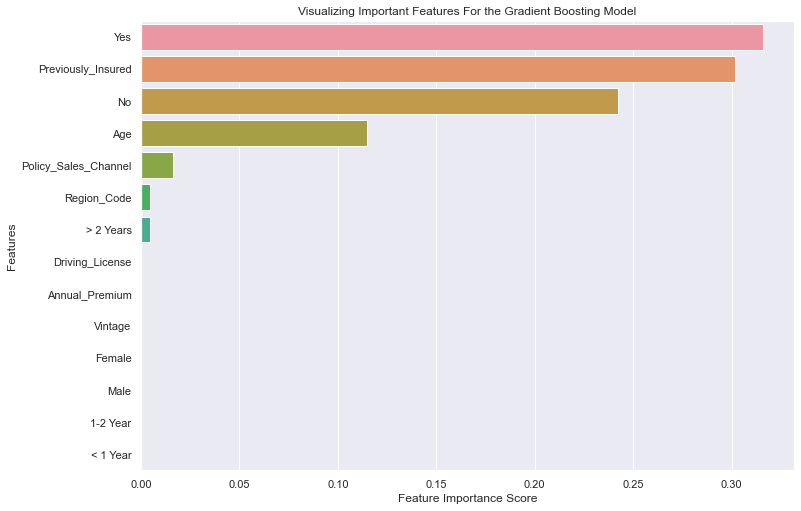

In [54]:
# Creating a bar plot
sns.barplot(x=feat_imp2, y=feat_imp2.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features For the Gradient Boosting Model")
plt.show()

- No need for feature selection based on the feature importance, since the model already performs well.

### Evaluating the model on the test set

In [55]:
#preparing the test set

#copy the test dataset
test_set2 = test_set.copy()

#copy the target values of the test dataset
y_test2= test_set2['Response'].copy()

#drop the target value from the test dataset
X_test2 = test_set2.drop('Response', axis=1)

In [56]:
#passing the features of the test set through the pipeline for transformation
X_test_prep2 = pipeline.transform(X_test2)

In [57]:
#evaluating the model on the test dataset
y_test_pred2 = model2.predict(X_test_prep2)

### Model accuracy on the test set

In [58]:
#evaluating the performance on the test set

print("Prediction accuracy on Test set: ", accuracy_score(y_test2, y_test_pred2))

Prediction accuracy on Test set:  0.8750623179659416


### Classification report

In [59]:
print(classification_report(y_test2, y_test_pred2))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### ROC Curve & AUC of Gradient Boosting Classifier

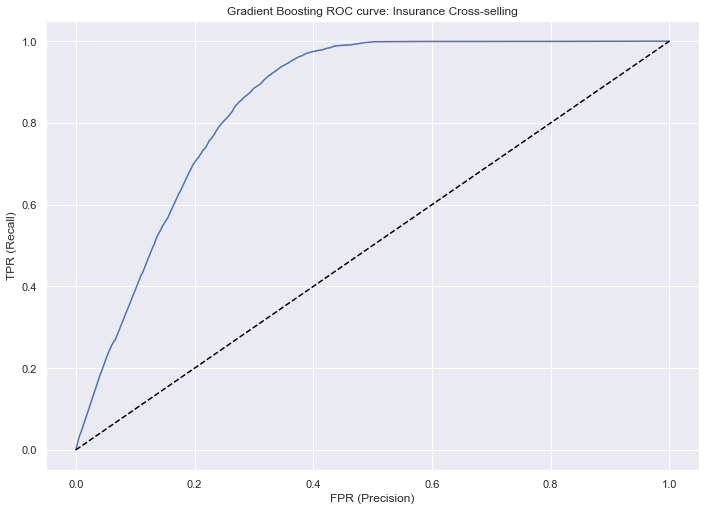

Area under curve (AUC):  0.8486784508064465


In [60]:
y_score2 = model2.predict_proba(X_test_prep2)[:,1]
fpr, tpr, _ = roc_curve(y_test2, y_score2)  

plt.title('Gradient Boosting ROC curve: Insurance Cross-selling')
plt.xlabel('FPR (Precision)') # false positive rate
plt.ylabel('TPR (Recall)')   # true positive rate

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr)) 

# 3. MLP Classifer Neural Network 

In [61]:
#Creating an Instance of the Multilayer Perceptron classifier
model3 = MLPClassifier(solver='lbfgs', random_state=0, max_iter=1000)

In [62]:
#Splitting the training data set X_trans and y into training and validation sets at a ratio of 70:30

X_train3, X_val3, y_train3, y_val3 = train_test_split(X_trans, y, test_size=0.30)

In [63]:
#Fitting the model
model3.fit(X_train3, y_train3)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(max_iter=1000, random_state=0, solver='lbfgs')

In [64]:
#predicting and evaluating the model on the training and validation set

model3_y_pred_train = model1.predict(X_train3)
model3_y_pred_val = model1.predict(X_val3)

In [65]:
#evaluating the performance on the training set and test set

print("Prediction accuracy on Training Set: ", accuracy_score(y_train3, model3_y_pred_train))
print("Prediction accuracy on Validation set: ", accuracy_score(y_val3, model3_y_pred_val))

Prediction accuracy on Training Set:  0.9601818011432856
Prediction accuracy on Validation set:  0.9614833765183072


### Evaluating the model on the test set

In [66]:
#preparing the test set

#copy the test dataset
test_set3 = test_set.copy()

#copy the target values of the test dataset
y_test3= test_set3['Response'].copy()

#drop the target value from the test dataset
X_test3 = test_set3.drop('Response', axis=1)

In [67]:
#passing the features of the test set through the pipeline for transformation
X_test_prep3 = pipeline.transform(X_test3)

In [68]:
#evaluating the model on the test dataset
y_test_pred3 = model3.predict(X_test_prep3)

### Model accuracy on the test set

In [69]:
#evaluating the performance on the test set

print("Prediction accuracy on Test set: ", accuracy_score(y_test3, y_test_pred3))

Prediction accuracy on Test set:  0.8743801002335284


### Classification report

In [70]:
print(classification_report(y_test3, y_test_pred3))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.46      0.03      0.05      9523

    accuracy                           0.87     76222
   macro avg       0.67      0.51      0.49     76222
weighted avg       0.83      0.87      0.82     76222



### ROC Curve & AUC of MLP classifier

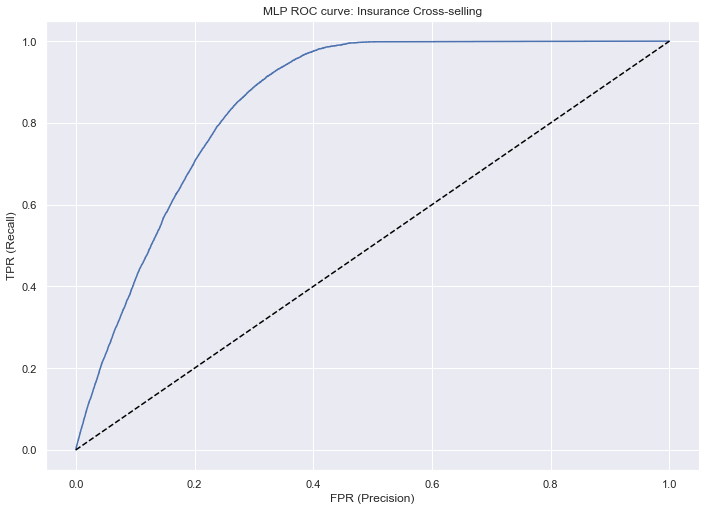

Area under curve (AUC):  0.8524145252431914


In [71]:
y_score3 = model3.predict_proba(X_test_prep3)[:,1]
fpr, tpr, _ = roc_curve(y_test2, y_score3)  

plt.title('MLP ROC curve: Insurance Cross-selling')
plt.xlabel('FPR (Precision)') # false positive rate
plt.ylabel('TPR (Recall)')   # true positive rate

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr)) 